In [2]:
import requests as r
import pandas as pd
from io import StringIO
import seaborn as sns
import matplotlib.pyplot as plt

from config import API_KEY

In [3]:
# API Call
top_stories = r.get(f"https://api.nytimes.com/svc/topstories/v2/home.json?api-key={API_KEY}").content.decode()

#prints top stories
1
nyt_home = pd.read_json(StringIO(top_stories))
# nyt_home
results = pd.json_normalize(nyt_home['results'])
results

,section,subsection,title,abstract,url,uri,byline,item_type,updated_date,created_date,published_date,material_type_facet,kicker,des_facet,org_facet,per_facet,geo_facet,multimedia,short_url
0,us,politics,From Pizzagate to the 2020 Election: Forcing L...,Michael J. Gottlieb is part of a cadre of lawy...,https://www.nytimes.com/2024/03/31/us/politics...,nyt://article/7e06d9a8-41c1-56be-99cc-84ededd4...,By Elizabeth Williamson,Article,2024-03-31T18:07:55-04:00,2024-03-31T12:23:34-04:00,2024-03-31T12:23:34-04:00,,,"[Libel and Slander, Suits and Litigation (Civi...","[Protect Democracy (Nonprofit), Infowars, Wash...","[Gottlieb, Michael J (Attorney), Freeman, Ruby...",[Georgia],[{'url': 'https://static01.nyt.com/images/2024...,
1,business,media,China’s Advancing Efforts to Influence the U.S...,China has adopted some of the same misinformat...,https://www.nytimes.com/2024/04/01/business/me...,nyt://article/1547f037-31fc-50ca-b816-2b8d4097...,By Tiffany Hsu and Steven Lee Myers,Article,2024-04-01T00:01:28-04:00,2024-04-01T00:01:28-04:00,2024-04-01T00:01:28-04:00,,,"[Rumors and Misinformation, Social Media, Cons...","[Beijing Bytedance Technology Co Ltd, Meta Pla...","[Biden, Joseph R Jr, Trump, Donald J]","[China, United States]",[{'url': 'https://static01.nyt.com/images/2024...,
2,world,europe,A Russian Defector’s Killing Raises Specter of...,"The death in Spain of Maksim Kuzminov, a pilot...",https://www.nytimes.com/2024/03/31/world/europ...,nyt://article/5fffc7c7-99b8-5a77-89e4-139a8f03...,By Michael Schwirtz and José Bautista,Article,2024-04-01T00:10:10-04:00,2024-03-31T00:02:00-04:00,2024-03-31T00:02:00-04:00,,,"[Defectors (Political), Assassinations and Att...",[],"[Kuzminov, Maksim (d 2024)]","[Russia, Villajoyosa (Spain), Ukraine]",[{'url': 'https://static01.nyt.com/images/2024...,
3,world,middleeast,Protests Against Netanyahu Intensify as Cease-...,Thousands have taken to the streets of Israel ...,https://www.nytimes.com/2024/03/31/world/middl...,nyt://article/8330c5a9-84a4-5240-bb4c-935f2214...,"By Adam Rasgon, Vivian Yee and Javier C. Herná...",Article,2024-03-31T22:36:33-04:00,2024-03-31T19:30:55-04:00,2024-03-31T19:30:55-04:00,,,"[Israel-Gaza War (2023- ), Politics and Govern...",[Hamas],"[Netanyahu, Benjamin]","[Israel, Gaza Strip, Jerusalem (Israel)]",[{'url': 'https://static01.nyt.com/images/2024...,
4,world,europe,What Happened When This Italian Province Inves...,The area around Bolzano has a thick network of...,https://www.nytimes.com/2024/04/01/world/europ...,nyt://article/d9007fda-527e-520e-9deb-72e06928...,By Jason Horowitz and Gaia Pianigiani,Article,2024-04-01T00:01:19-04:00,2024-04-01T00:01:19-04:00,2024-04-01T00:01:19-04:00,,,"[Families and Family Life, Children and Childh...",[],[],[Bolzano (Italy)],[{'url': 'https://static01.nyt.com/images/2024...,
5,business,,What 10 Years of Modi Rule Has Meant for India...,Narendra Modi has kept India on its swift upwa...,https://www.nytimes.com/2024/04/01/business/in...,nyt://article/12e5ed22-7416-56c1-8c1d-c20a9c4b...,By Alex Travelli,Article,2024-04-01T00:34:07-04:00,2024-04-01T00:00:22-04:00,2024-04-01T00:00:22-04:00,,,"[Economic Conditions and Trends, Income Inequa...",[],"[Modi, Narendra, Adani, Gautam S]","[India, Bihar (India), Delhi (India), Mumbai (...",[{'url': 'https://static01.nyt.com/images/2024...,
6,business,,5 Things to Know to Understand India’s Economy...,As Prime Minister Narendra Modi seeks a third ...,https://www.nytimes.com/2024/04/01/business/in...,nyt://article/795117d8-c3f6-50ae-918f-2476bb3f...,By Alex Travelli,Article,2024-04-01T00:34:50-04:00,2024-04-01T00:01:27-04:00,2024-04-01T00:01:27-04:00,,,"[International Relations, Income Inequality, P...",[],"[Modi, Narendra, Singh, Manmohan]",[India],[{'url': 'https://static01.nyt.com/images/2024...,
7,world,middleeast,"Istanbul Mayor Headed for Re-election, in Blow...",The opposition chalked up gains against Presid...,https://www.nytimes.com/2024/03/31/world/middl...,nyt://article/8f7c3dc3-7004-5d46-

In [4]:
keywords = results['des_facet'].explode() #uses column as reference
keywords = keywords.value_counts() #counts occurrence of words
print(keywords)

des_facet
Politics and Government                      8
International Relations                      5
Presidential Election of 2024                2
Economic Conditions and Trends               2
Income Inequality                            2
                                            ..
Elections, Mayors                            1
Territorial Disputes                         1
Video Recordings, Downloads and Streaming    1
Babies and Infants                           1
Gladiators (TV Program)                      1
Name: count, Length: 81, dtype: int64


In [5]:
keywords = keywords.reset_index()

keywords

,des_facet,count
0,Politics and Government,8
1,International Relations,5
2,Presidential Election of 2024,2
3,Economic Conditions and Trends,2
4,Income Inequality,2
...,...,...
76,"Elections, Mayors",1
77,Territorial Disputes,1
78,"Video Recordings, Downloads and Streaming",1
79,Babies and Infants,1


/var/folders/x3/25ccm_z10rd1__95y4qz72m80000gn/T/ipykernel_13691/2217994412.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='des_facet', data=top_10_keywords, palette='viridis')  # Use a color palette for better visualization


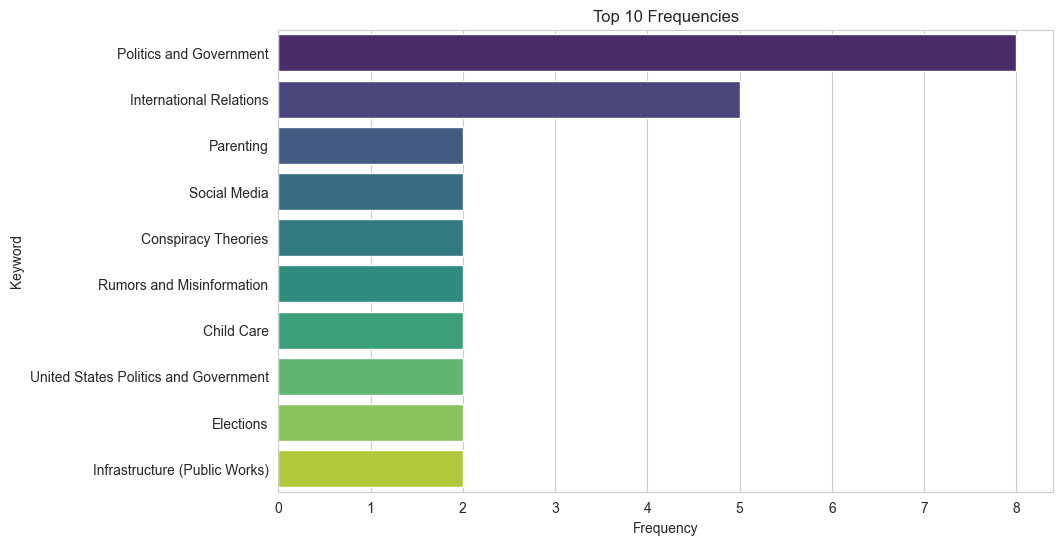

In [9]:
sns.set_style("whitegrid")

# Sort the keywords DataFrame by the 'count' column and take the top 10 rows
top_10_keywords = keywords.sort_values(by='count', ascending=False).head(10)

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.barplot(x='count', y='des_facet', data=top_10_keywords, palette='viridis')  # googled color palette, shows top 10

plt.title('Top 10 Frequencies')  # Name chart
plt.xlabel('Frequency')  # Name x-axis
plt.ylabel('Keyword')  # Name y-axis

plt.show()

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# sample articles published
np.random.seed(0)
date_range = pd.date_range(start='2024-01-01', end='2024-03-31', freq='D')
articles = pd.DataFrame({'published_date': np.random.choice(date_range, size=300)})

Text(0, 0.5, 'Number of Articles')

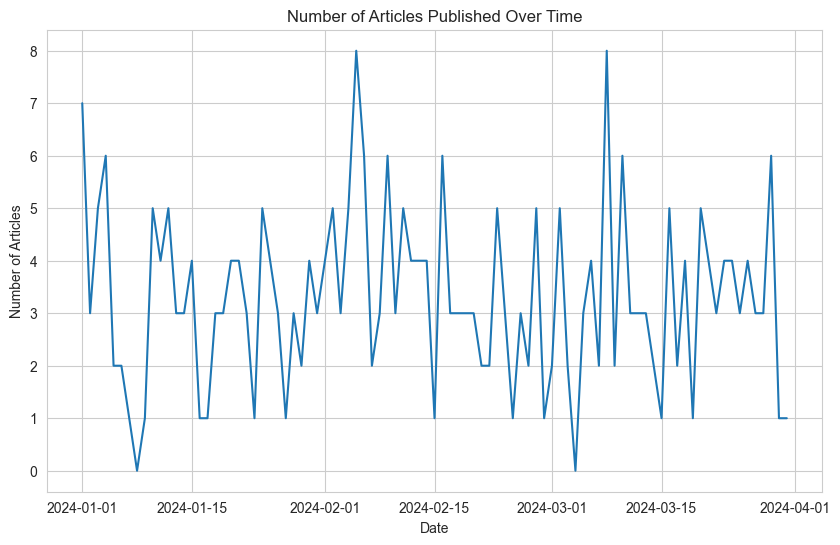

In [27]:
articles['published_date'] = pd.to_datetime(articles['published_date'])

# Count the number of articles published per day
articles_per_day = articles['published_date'].value_counts().sort_index()

# Resample the data to get daily counts, filling missing days with 0
articles_per_day = articles_per_day.resample('D').sum().fillna(0)

plt.figure(figsize=(10, 6))  #Adjust the figure size as needed
sns.lineplot(x=articles_per_day.index, y=articles_per_day.values)  #line plot for daily aggregation

plt.title('Number of Articles Published Over Time')  #Name chart
plt.xlabel('Date')  #Name x-axis
plt.ylabel('Number of Articles')  #Name y-axis